### IMPORTING LIBRARIES AND THEIR MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd

### LOADING PREDICTOR FILE

In [2]:
pred = np.loadtxt(r"C:\Users\Chaitanya\Desktop\MDSI\output.txt")

### LOADING TARGET FILE

In [3]:
targ = np.loadtxt(r"C:\Users\Chaitanya\Desktop\MDSI\aten.txt")

### FINGERPRINTING

In [4]:
predictors = np.zeros(3)
for i in range(pred.shape[0]):
    fc = pred[i,0] / np.sum(pred[i])
    fh = pred[i,1] / np.sum(pred[i])
    fo = pred[i,2] / np.sum(pred[i])
    temp = np.array([fc, fh, fo])
    predictors = np.vstack((predictors, temp))
predictors = np.delete(predictors, 0, axis=0)

### INPUT FILE

In [5]:
predictors

array([[0.36363636, 0.45454545, 0.18181818],
       [0.34285714, 0.57142857, 0.08571429],
       [0.33333333, 0.6       , 0.06666667],
       [0.51724138, 0.34482759, 0.13793103],
       [0.33333333, 0.33333333, 0.33333333],
       [0.37037037, 0.59259259, 0.03703704],
       [0.58333333, 0.33333333, 0.08333333],
       [0.33333333, 0.53333333, 0.13333333],
       [0.3125    , 0.5625    , 0.125     ],
       [0.5       , 0.36363636, 0.13636364],
       [0.45833333, 0.5       , 0.04166667],
       [0.30769231, 0.53846154, 0.15384615],
       [0.30769231, 0.53846154, 0.15384615],
       [0.43478261, 0.43478261, 0.13043478],
       [0.43478261, 0.39130435, 0.17391304],
       [0.38461538, 0.53846154, 0.07692308],
       [0.5       , 0.41666667, 0.08333333],
       [0.33333333, 0.5       , 0.16666667],
       [0.45454545, 0.45454545, 0.09090909],
       [0.38461538, 0.38461538, 0.23076923],
       [0.28      , 0.48      , 0.24      ],
       [0.52380952, 0.28571429, 0.19047619],
       [0.

### STANDARDIZATION

In [6]:
scaler = StandardScaler()
normal_predictors = scaler.fit_transform(predictors)

In [7]:
normal_predictors

array([[-3.00924831e-01, -2.39039745e-01,  5.41428463e-01],
       [-5.26657465e-01,  9.17884936e-01, -4.62092461e-01],
       [-6.30118255e-01,  1.20068875e+00, -6.60988499e-01],
       [ 1.36774528e+00, -1.32504184e+00,  8.31570252e-02],
       [-6.30118255e-01, -1.43881349e+00,  2.12355604e+00],
       [-2.27770737e-01,  1.12736924e+00, -9.70382338e-01],
       [ 2.08572749e+00, -1.43881349e+00, -4.86954465e-01],
       [-6.30118255e-01,  5.40813188e-01,  3.51476365e-02],
       [-8.56438734e-01,  8.29508745e-01, -5.18693805e-02],
       [ 1.18044558e+00, -1.13887005e+00,  6.67901882e-02],
       [ 7.27804619e-01,  2.10875409e-01, -9.22039550e-01],
       [-9.08666537e-01,  5.91572847e-01,  2.49343371e-01],
       [-9.08666537e-01,  5.91572847e-01,  2.49343371e-01],
       [ 4.71964077e-01, -4.34655030e-01,  4.88084802e-03],
       [ 4.71964077e-01, -8.65008655e-01,  4.58882676e-01],
       [-7.30216917e-02,  5.91572847e-01, -5.53890632e-01],
       [ 1.18044558e+00, -6.13969040e-01

### TRAINING AND TESTING DATA

In [8]:
normal_predictor_train, normal_predictor_test, targ_train, targ_test = train_test_split(normal_predictors, targ, test_size=0.20, random_state=8, shuffle=True)
n_cols = normal_predictors.shape[1]

### DESIGNING THE NETWORK

In [9]:
def regression_model():
    model = Sequential()
    model.add(Dense(500, activation='relu', input_shape=(n_cols,)))      # 1 hidden layer with 500 neurons
    model.add(Dropout(0.2))                                              # dropping out 20% values 
    model.add(Dense(1, activation='linear'))
 
    model.compile(optimizer='adam', loss='mean_squared_error')           # L2 Norm loss used
    return model

model = regression_model()

### ITERATION AND CALCULATION OF LOSS AND VALIDATION LOSS

In [10]:
trial = model.fit(normal_predictor_train, targ_train, epochs=1000, verbose=1, validation_split=0.01)

Epoch 1/1000
6/6 [==============================] - 1s 33ms/step - loss: 39.8225 - val_loss: 42.6799
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 35.8027 - val_loss: 37.8621
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 32.3485 - val_loss: 33.3743
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 28.8650 - val_loss: 29.2079
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 25.6486 - val_loss: 25.1508
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 22.6363 - val_loss: 21.2035
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 19.7138 - val_loss: 17.3474
Epoch 8/1000
6/6 [==============================] - 0s 7ms/step - loss: 16.7963 - val_loss: 13.8863
Epoch 9/1000
6/6 [==============================] - 0s 7ms/step - loss: 14.0044 - val_loss: 10.7144
Epoch 10/1000
6/6 [==============================] - 0s 7ms/step - loss: 11.5237 - val_loss: 7.9045

Epoch 165/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0642 - val_loss: 0.0057
Epoch 166/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0596 - val_loss: 0.0035
Epoch 167/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0572 - val_loss: 0.0015
Epoch 168/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0537 - val_loss: 0.0024
Epoch 169/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0629 - val_loss: 0.0045
Epoch 170/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0676 - val_loss: 0.0084
Epoch 171/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0565 - val_loss: 0.0117
Epoch 172/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0525 - val_loss: 0.0140
Epoch 173/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0506 - val_loss: 0.0066
Epoch 174/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0617 - val_loss: 0.0

Epoch 328/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0436 - val_loss: 0.0131
Epoch 329/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0447 - val_loss: 0.0101
Epoch 330/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0522 - val_loss: 0.0055
Epoch 331/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0453 - val_loss: 0.0034
Epoch 332/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0458 - val_loss: 0.0016
Epoch 333/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0494 - val_loss: 0.0066
Epoch 334/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0480 - val_loss: 0.0160
Epoch 335/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0524 - val_loss: 0.0181
Epoch 336/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0548 - val_loss: 0.0124
Epoch 337/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0457 - val_loss: 0.0149


Epoch 491/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0430 - val_loss: 0.0116
Epoch 492/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0493 - val_loss: 0.0088
Epoch 493/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0500 - val_loss: 0.0108
Epoch 494/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0421 - val_loss: 0.0421
Epoch 495/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0404 - val_loss: 0.0113
Epoch 496/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0432 - val_loss: 0.0025
Epoch 497/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0335 - val_loss: 0.0030
Epoch 498/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0435 - val_loss: 0.0067
Epoch 499/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0425 - val_loss: 0.0121
Epoch 500/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0375 - val_loss: 0.01

Epoch 654/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0399 - val_loss: 0.0211
Epoch 655/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0436 - val_loss: 0.0052
Epoch 656/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0387 - val_loss: 0.0178
Epoch 657/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0438 - val_loss: 0.0086
Epoch 658/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0394 - val_loss: 0.0093
Epoch 659/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0467 - val_loss: 0.0118
Epoch 660/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0390 - val_loss: 0.0048
Epoch 661/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0365 - val_loss: 4.9131e-04
Epoch 662/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0455 - val_loss: 0.0033
Epoch 663/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0461 - val_loss: 0.0

6/6 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.0075
Epoch 817/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0391 - val_loss: 0.0049
Epoch 818/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0364 - val_loss: 0.0114
Epoch 819/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0365 - val_loss: 0.0060
Epoch 820/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0417 - val_loss: 0.0039
Epoch 821/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0404 - val_loss: 0.0029
Epoch 822/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0448 - val_loss: 0.0191
Epoch 823/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0410 - val_loss: 0.0060
Epoch 824/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0421 - val_loss: 0.0031
Epoch 825/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0347 - val_loss: 0.0015
Epoch 826/100

Epoch 898/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0410 - val_loss: 9.9339e-04
Epoch 899/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0368 - val_loss: 0.0015
Epoch 900/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0409 - val_loss: 0.0024
Epoch 901/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0433 - val_loss: 0.0054
Epoch 902/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0417 - val_loss: 0.0035
Epoch 903/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0397 - val_loss: 0.0016
Epoch 904/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0377 - val_loss: 0.0192
Epoch 905/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0430 - val_loss: 0.0032
Epoch 906/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0439 - val_loss: 0.0047
Epoch 907/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0457 - val_loss: 0.0

### LOSS AND VALIDATION LOSS PLOTTED AGAINST ITERATIONS

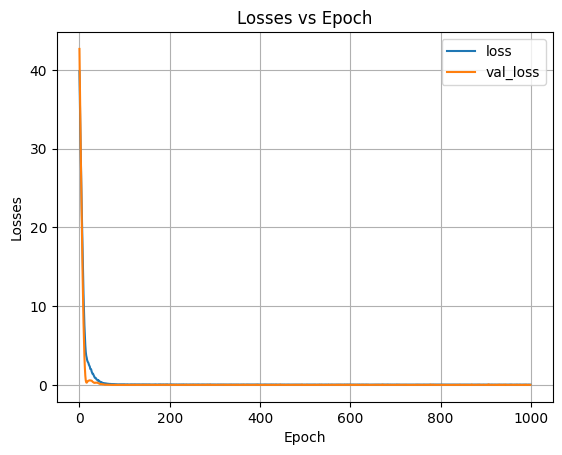

In [19]:
plt.figure()
plt.plot(trial.history['loss'], label='loss')
plt.plot(trial.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()

### PREDICTING USING TRAINING DATA

In [12]:
test_run = model.predict(normal_predictor_train)

6/6 [==============================] - 0s 1ms/step


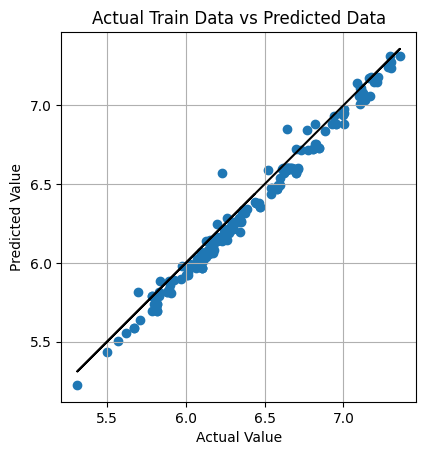

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(targ_train, test_run)
plt.title("Actual Train Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(targ, targ, 'k-')
plt.grid()

In [14]:
print(r2_score(targ_train, test_run))

0.97010499226492


### PREDICTING FROM TEST DATA

In [15]:
prediction = model.predict(normal_predictor_test)

2/2 [==============================] - 0s 3ms/step


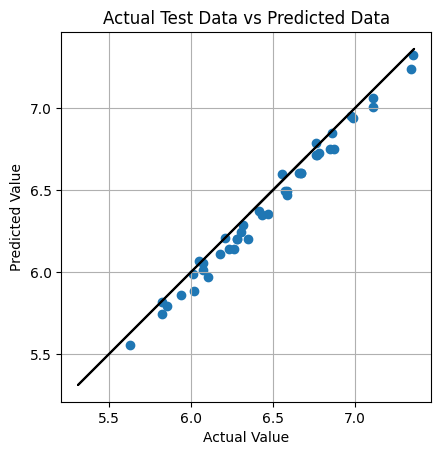

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(targ_test, prediction)
plt.title("Actual Test Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(targ_train, targ_train, 'k-')
plt.grid()

### PARITY CHART (COMPARING ACTUAL DATA AND PREDICTED DATA)

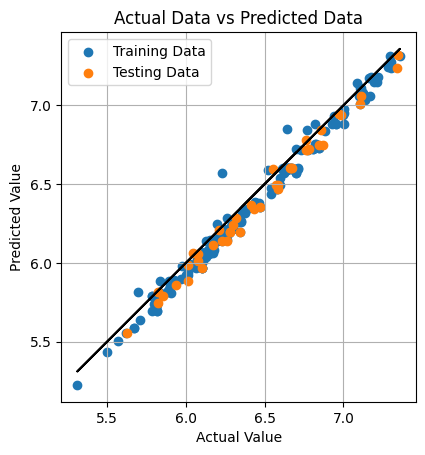

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(targ_train, test_run, label = 'Training Data')
plt.scatter(targ_test, prediction, label = 'Testing Data')
plt.legend()
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(targ_train, targ_train, 'k-')
plt.grid()